### Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)

In [2]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [3]:
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()

### EDA

In [4]:
path_to_file = "data_cleaned.csv"

In [5]:
data = pd.read_csv(path_to_file)
data.head().T

,0,1,2,3,4
Ptid,P1,P2,P3,P4,P5
Persistency_Flag,Persistent,Non-Persistent,Non-Persistent,Non-Persistent,Non-Persistent
Gender,Male,Male,Female,Female,Female
Race,Caucasian,Asian,Other/Unknown,Caucasian,Caucasian
Ethnicity,Not Hispanic,Not Hispanic,Hispanic,Not Hispanic,Not Hispanic
Region,West,West,Midwest,Midwest,Midwest
Age_Bucket,0,2,1,0,0
Ntm_Speciality,GENERAL PRACTITIONER,GENERAL PRACTITIONER,GENERAL PRACTITIONER,GENERAL PRACTITIONER,GENERAL PRACTITIONER
Ntm_Specialist_Flag,Others,Others,Others,Others,Others
Ntm_Speciality_Bucket,OB/GYN/Others/PCP/Unknown,OB/GYN/Others/PCP/Unknown,OB/GYN/Others/PCP/Unknown,OB/GYN/Others/PCP/Unknown,OB/GYN/Others/PCP/Unknown


In [6]:
data['Persistency_Flag'].value_counts() / data.shape[0]

Non-Persistent    0.62354
Persistent        0.37646
Name: Persistency_Flag, dtype: float64

### Analysis and Preprocessing

In [7]:
data.dtypes

Ptid                                                                  object
Persistency_Flag                                                      object
Gender                                                                object
Race                                                                  object
Ethnicity                                                             object
Region                                                                object
Age_Bucket                                                             int64
Ntm_Speciality                                                        object
Ntm_Specialist_Flag                                                   object
Ntm_Speciality_Bucket                                                 object
Gluco_Record_Prior_Ntm                                                 int64
Gluco_Record_During_Rx                                                 int64
Dexa_Freq_During_Rx                                                    int64

In [8]:
data['Ptid'].value_counts()

P1234    1
P2540    1
P608     1
P3218    1
P527     1
P2892    1
P3321    1
P1550    1
P2652    1
P1561    1
P51      1
P1322    1
P858     1
P1653    1
P3222    1
P889     1
P2017    1
P1510    1
P1045    1
P537     1
P687     1
P1016    1
P195     1
P2482    1
P398     1
P1296    1
P1826    1
P2461    1
P1738    1
P2413    1
P2498    1
P1764    1
P2747    1
P2709    1
P594     1
P1709    1
P2680    1
P959     1
P340     1
P1465    1
P2483    1
P2212    1
P986     1
P2609    1
P1387    1
P1165    1
P1755    1
P3050    1
P1072    1
P394     1
P942     1
P3401    1
P1652    1
P46      1
P1903    1
P1990    1
P2925    1
P625     1
P283     1
P2619    1
P2664    1
P76      1
P604     1
P1117    1
P80      1
P2087    1
P3202    1
P427     1
P225     1
P3146    1
P31      1
P1635    1
P2645    1
P2248    1
P1266    1
P3001    1
P1212    1
P448     1
P585     1
P2408    1
P309     1
P3406    1
P1405    1
P2279    1
P1847    1
P1599    1
P1588    1
P7       1
P1572    1
P1257    1
P2319    1

In [9]:
data = data.drop(['Ptid'], axis=1)

In [10]:
data.head().T

,0,1,2,3,4
Persistency_Flag,Persistent,Non-Persistent,Non-Persistent,Non-Persistent,Non-Persistent
Gender,Male,Male,Female,Female,Female
Race,Caucasian,Asian,Other/Unknown,Caucasian,Caucasian
Ethnicity,Not Hispanic,Not Hispanic,Hispanic,Not Hispanic,Not Hispanic
Region,West,West,Midwest,Midwest,Midwest
Age_Bucket,0,2,1,0,0
Ntm_Speciality,GENERAL PRACTITIONER,GENERAL PRACTITIONER,GENERAL PRACTITIONER,GENERAL PRACTITIONER,GENERAL PRACTITIONER
Ntm_Specialist_Flag,Others,Others,Others,Others,Others
Ntm_Speciality_Bucket,OB/GYN/Others/PCP/Unknown,OB/GYN/Others/PCP/Unknown,OB/GYN/Others/PCP/Unknown,OB/GYN/Others/PCP/Unknown,OB/GYN/Others/PCP/Unknown
Gluco_Record_Prior_Ntm,0,0,0,0,1


In [11]:
data.select_dtypes(include=object).columns

Index(['Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket',
       'Adherent_Flag'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Persistency_Flag'] = le.fit_transform(data['Persistency_Flag'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Race'] = le.fit_transform(data['Race'])
data['Ethnicity'] = le.fit_transform(data['Ethnicity'])
data['Region'] = le.fit_transform(data['Region'])
data['Ntm_Speciality'] = le.fit_transform(data['Ntm_Speciality'])
data['Ntm_Specialist_Flag'] = le.fit_transform(data['Ntm_Specialist_Flag'])
data['Ntm_Speciality_Bucket'] = le.fit_transform(data['Ntm_Speciality_Bucket'])
data['Adherent_Flag'] = le.fit_transform(data['Adherent_Flag'])

data.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,1,1,2,1,4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,4,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,2,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [13]:
data.shape

(3424, 65)

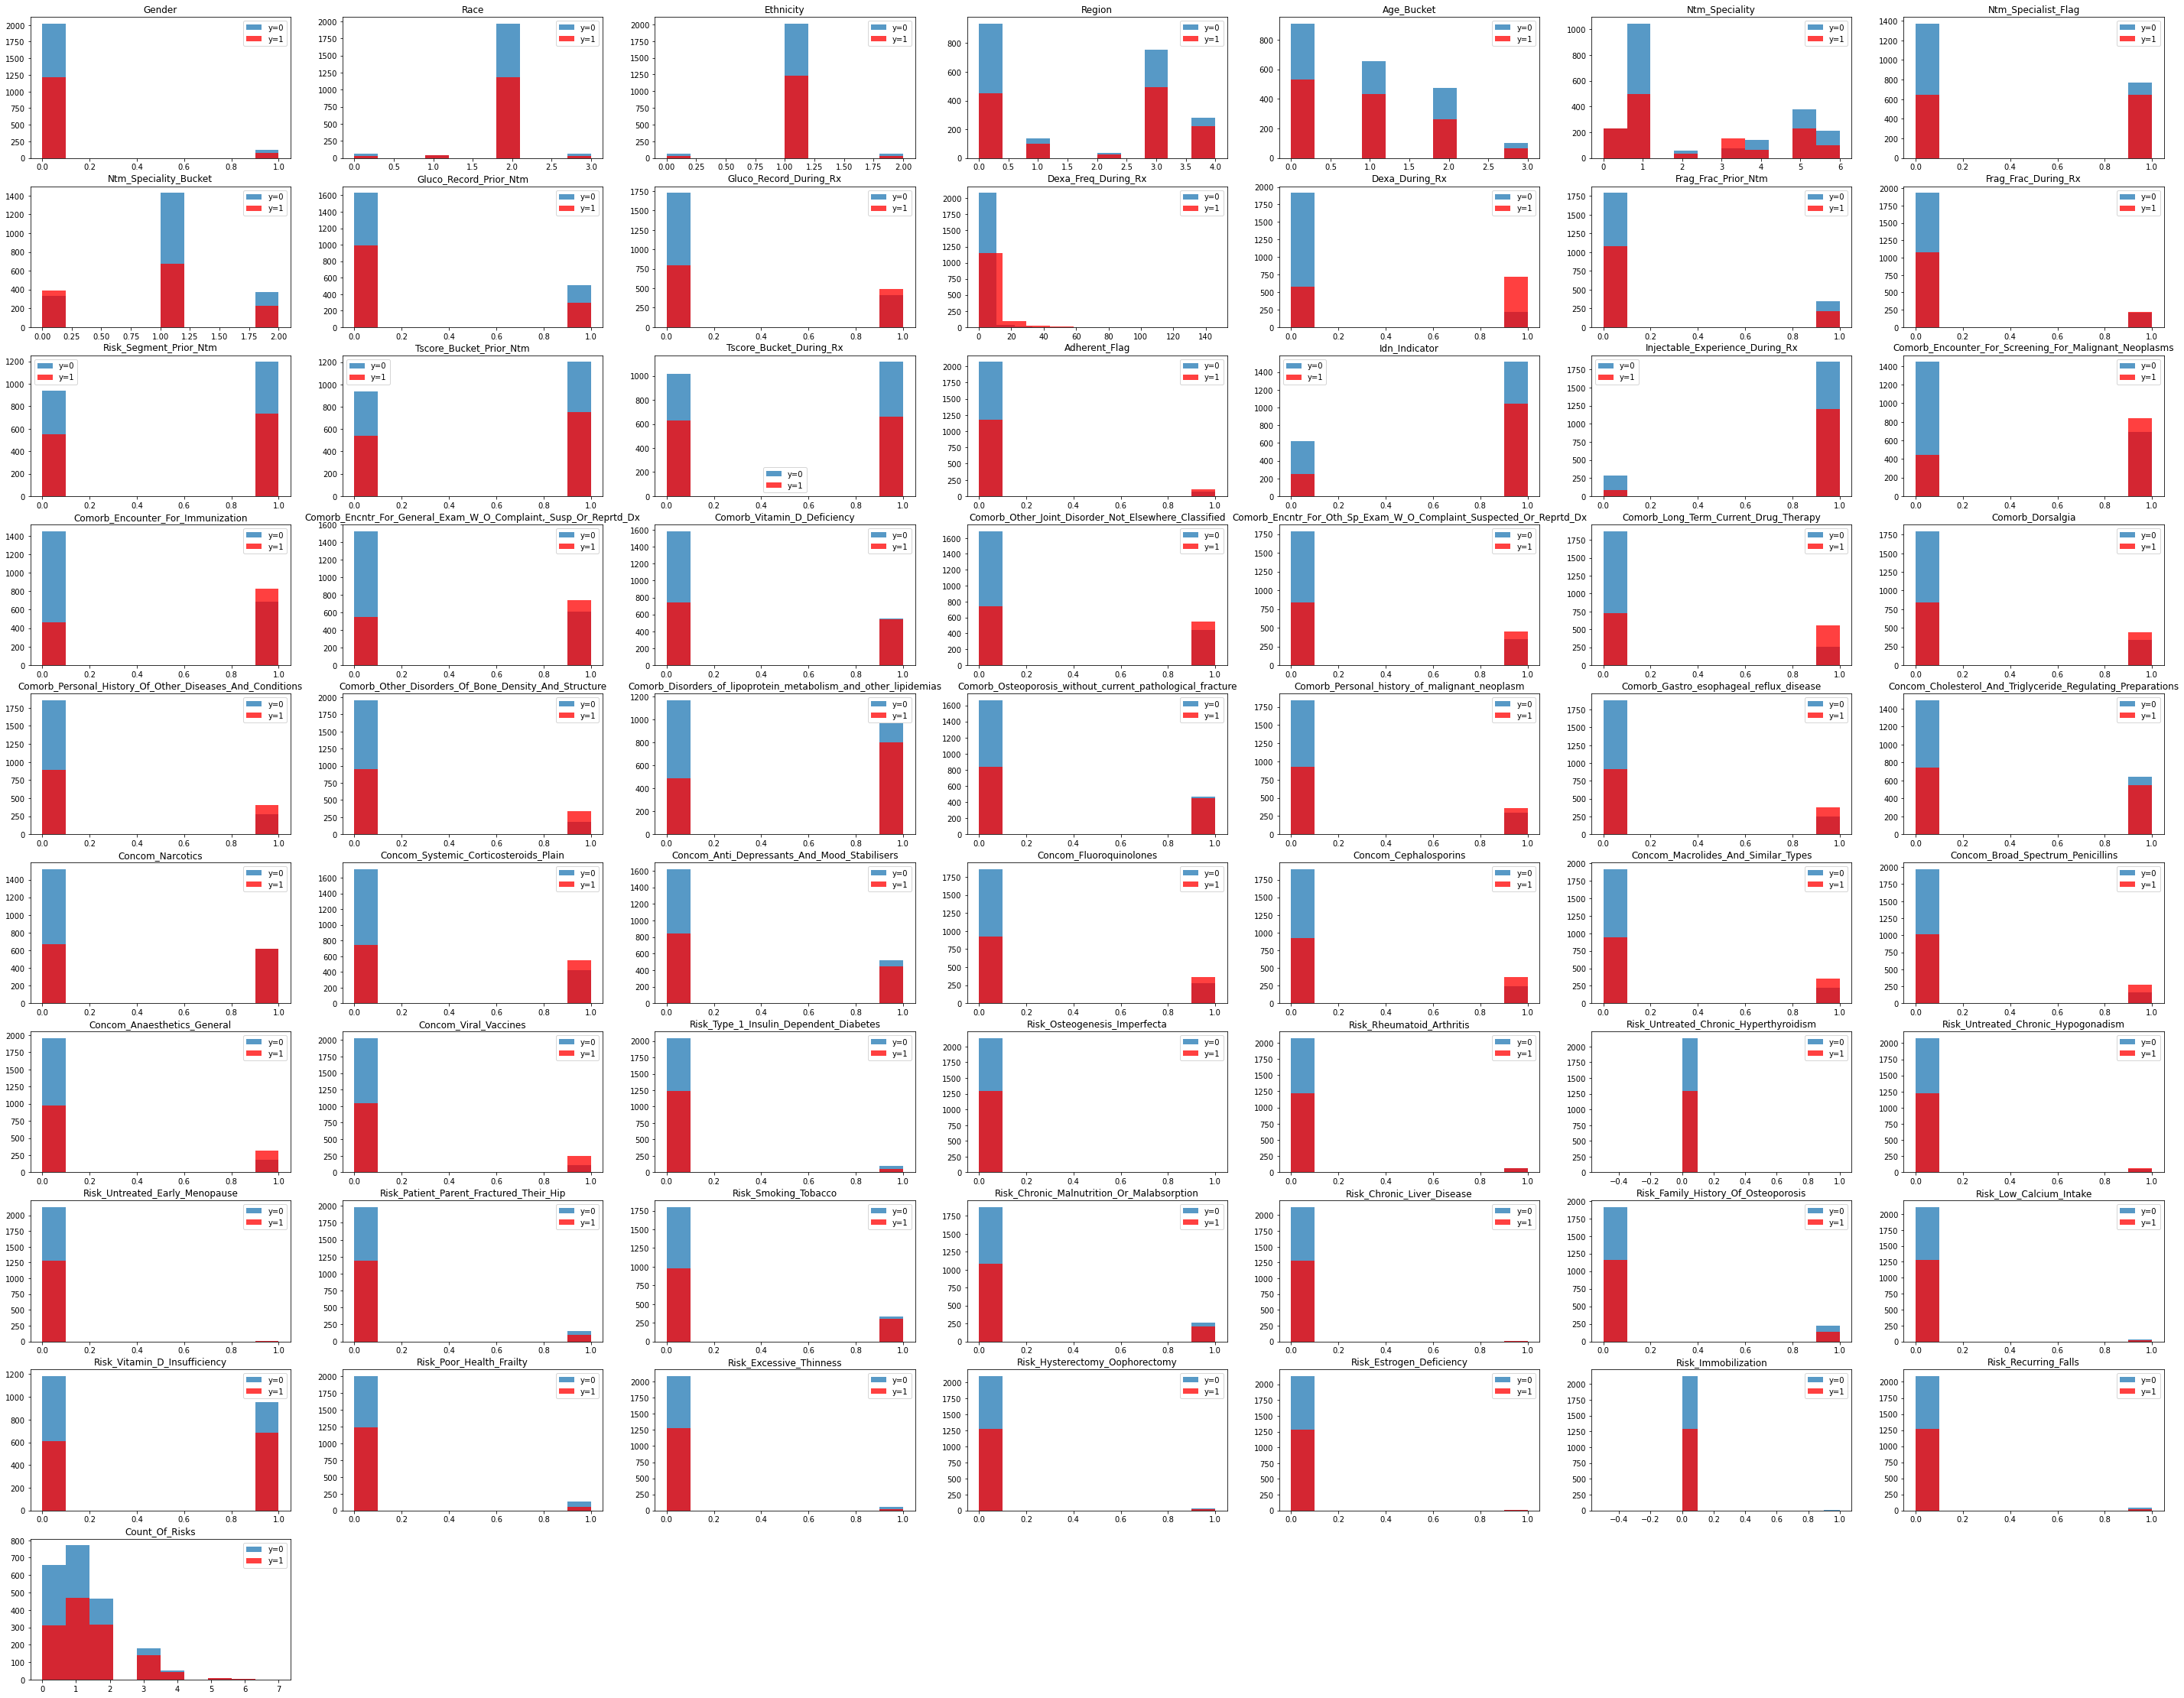

In [14]:
# histogram for each class

plt.figure(figsize=(50,40))

idx_0 =  data['Persistency_Flag'] == 0
idx_1 =  data['Persistency_Flag'] == 1

# your code here
for i,feature in enumerate(data.columns.drop(['Persistency_Flag'])):
    plt.subplot(10,7,i+1)   
    plt.hist(data.loc[idx_0,feature],density=0, alpha=0.75,label='y=0')
    plt.hist(data.loc[idx_1,feature],density=0, facecolor='red', alpha=0.75,label='y=1')
    plt.legend()
    plt.title(feature)

plt.show()

## Correlation

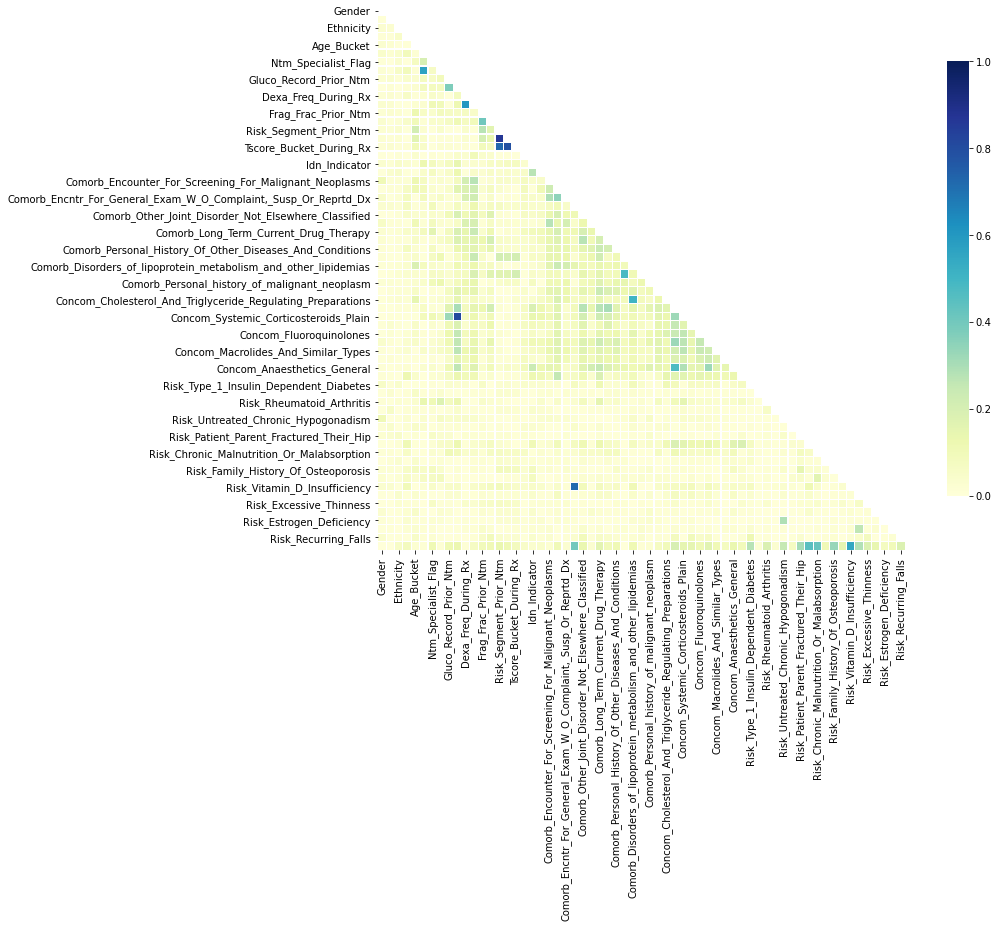

In [15]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(data.drop(['Persistency_Flag'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

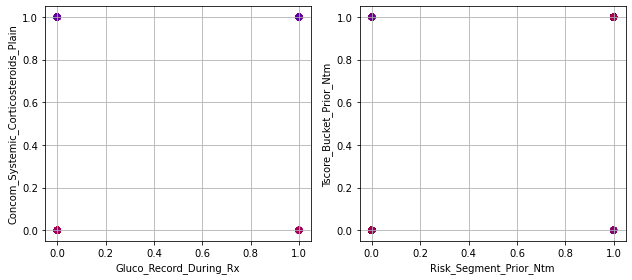

In [16]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
pairs = np.where(upper>0.8)
fx = data.columns[pairs[0]]
fy =  data.columns[pairs[1]]

i=1
plt.figure(figsize=(22,4))
for f1,f2 in zip(fx,fy):
    
    plt.subplot(1,5,i)
    
    plt.scatter(data[f1],data[f2], c=data['Persistency_Flag'],cmap=cm_bright, alpha=0.25)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.grid()
    plt.tight_layout()
    
    i+=1
    
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# preparamos los datos

features = data.columns.drop(['Persistency_Flag'])

X = data[features].values
y = data['Persistency_Flag'].values


# PASO 1:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Proporcion train:%0.3f'%np.mean(y_train))
print('Proporcion test: %0.3f'%np.mean(y_test))

Datos train:  (2568, 64)
Datos test:   (856, 64)
Proporcion train:0.377
Proporcion test: 0.376


### Decision Tree

best mean cross-validation score: 0.783
best parameters: {'max_depth': 1}


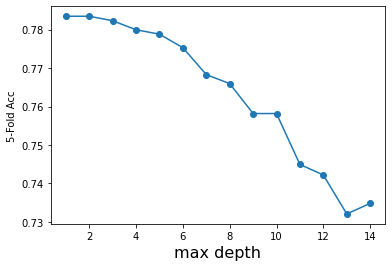

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [19]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.7834890965732088
Test:  0.7792056074766355


In [20]:
y_test_pred = treeModel.predict(X_test)

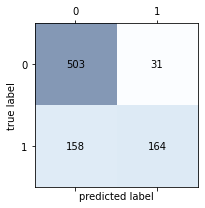

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       534
           1       0.84      0.51      0.63       322

    accuracy                           0.78       856
   macro avg       0.80      0.73      0.74       856
weighted avg       0.79      0.78      0.76       856



In [21]:
from sklearn.metrics import classification_report, confusion_matrix
confmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_test_pred))

In [22]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(treeModel, out_file=None, 
                         feature_names=features,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 

graph

ModuleNotFoundError: No module named 'graphviz'

Dexa_Freq_During_Rx is clearly the variable that has the most value in terms of predictive power. It could be interesting to
see if we can get similar results without it. Take into account the Dexa_Freq_During_Rx is kind of another type of 
treatment. So it would be better to be able to predict persistence without it.

### What if we drop Dexa_Freq_During_Rx?

In [ ]:
data.head().T

In [ ]:
features = data.columns.drop(['Persistency_Flag', 'Dexa_Freq_During_Rx'])

X = data[features].values
y = data['Persistency_Flag'].values


# PASO 1:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Proporcion train:%0.3f'%np.mean(y_train))
print('Proporcion test: %0.3f'%np.mean(y_test))

In [ ]:
maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [ ]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

In [ ]:
y_test_pred = treeModel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_test_pred))

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(treeModel, out_file=None, 
                         feature_names=features,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 

graph

Dexa_During_Rx is a pretty similar to Dexa_Freq_During_Rx. We suppose they reffer to the same treatment.

### What if we drop Dexa_During_Rx?

In [ ]:
features = data.columns.drop(['Persistency_Flag', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx'])

X = data[features].values
y = data['Persistency_Flag'].values


# PASO 1:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Proporcion train:%0.3f'%np.mean(y_train))
print('Proporcion test: %0.3f'%np.mean(y_test))

In [ ]:
maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [ ]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

In [ ]:
y_test_pred = treeModel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_test_pred))

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(treeModel, out_file=None, 
                         feature_names=features,  
                         filled=True, rounded=True,  
                         special_characters=True,
                         class_names=['Persistent','Non-persistent'])
graph = graphviz.Source(dot_data) 

graph

In [ ]:
importance = treeModel.feature_importances_
# summarize feature importance
dicts = {}
for i,v in zip(features, importance):
	dicts[i] = (i,v)
#plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
importance_df = pd.DataFrame.from_dict(dicts, orient='index')

In [ ]:
#importance_df.reset_index()

importance_df.sort_values(1, ascending=False)